# Analysis
In this section, I will perform different analysis on the whole dataset.

First I will compare Fitbit Sleep Data with SleepScore Data

In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime as dt
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import pycaret.classification as c
import pycaret.regression as r
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_pickle('../data/all.csv')

In [3]:
df.iloc[:,:20].head()

,Date,Mood,Mood_num,Mood_bin,Mood_bin_num,Time,Day,Entertainment,Exercise,Family,Food,Friends,Hobby,Love,Music,NightOut,Projects,School,SelfCare,Sleep
0,2022-10-01,Okay,2,Bad,0,16.200000,Saturday,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2022-10-02,Bad,1,Bad,0,20.750000,Sunday,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2022-10-03,Terrific,4,Good,1,18.350000,Monday,0,1,1,1,1,1,1,0,0,1,1,1,1
3,2022-10-04,Terrific,4,Good,1,22.733333,Tuesday,0,0,0,0,0,0,1,0,0,0,0,1,0
4,2022-10-05,Okay,2,Bad,0,22.150000,Wednesday,0,0,0,0,0,0,0,0,0,0,1,0,0


In [4]:
df.iloc[:,20:40].head()

,CaffeineCups,AlcoholDrinks,Stress,Sleepiness,PreviousNightMood,GeoLatitude,GeoLongitude,StressR7DM,SleepinessR7DM,AtHome,CaloriesBurned,Steps,Distance,Floors,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,ActivityCalories,CaloriesBurned_R7DM
0,0.0,0.0,0.16,0.16,NaN,53.780268,-7.469254,NaN,NaN,1,3068.0,9944.0,7.25,19.0,464.0,379.0,4.0,6.0,1660.0,3068.0
1,0.0,0.0,0.24,0.44,NaN,53.780260,-7.469239,NaN,NaN,1,2979.0,10925.0,8.01,19.0,577.0,292.0,17.0,26.0,1504.0,3023.5
2,0.0,0.0,0.52,0.56,NaN,53.780263,-7.469287,NaN,NaN,1,3496.0,12709.0,9.26,12.0,523.0,390.0,28.0,12.0,2143.0,3181.0
3,0.0,0.0,0.24,0.32,NaN,53.383453,-6.257561,0.290,0.370,0,2769.0,9808.0,7.17,17.0,752.0,209.0,21.0,12.0,1242.0,3078.0
4,0.0,1.0,0.16,0.44,NaN,53.383464,-6.257524,0.264,0.384,0,3146.0,12934.0,9.44,16.0,729.0,246.0,28.0,37.0,1632.0,3091.6


In [5]:
df.iloc[:,40:60].head()

,Steps_R7DM,Distance_R7DM,Floors_R7DM,SedentaryMinutes_R7DM,LightlyActiveMinutes_R7DM,FairlyActiveMinutes_R7DM,VeryActiveMinutes_R7DM,ActivityCalories_R7DM,FB_Onset,FB_Offset,FB_TST,FB_WASO,FB_NOA,FB_TIB,FB_REMSD,FB_LSD,FB_DSD,FB_TSDP,FB_AI,FB_SWSP
0,9944.000000,7.250000,19.000000,464.000000,379.000000,4.000000,6.000000,1660.00,23.183333,7.533333,447.0,54.0,33.0,501.0,80.0,277.0,90.0,501.0,4.429530,20.134228
1,10434.500000,7.630000,19.000000,520.500000,335.500000,10.500000,16.000000,1582.00,22.550000,7.350000,437.0,91.0,32.0,528.0,84.0,297.0,56.0,528.0,4.393593,12.814645
2,11192.666667,8.173333,16.666667,521.333333,353.666667,16.333333,14.666667,1769.00,22.750000,6.866667,426.0,61.0,28.0,487.0,104.0,264.0,58.0,487.0,3.943662,13.615023
3,10846.500000,7.922500,16.750000,579.000000,317.500000,17.500000,14.000000,1637.25,23.150000,6.583333,382.0,64.0,28.0,446.0,53.0,247.0,82.0,446.0,4.397906,21.465969
4,11264.000000,8.226000,16.600000,609.000000,303.200000,19.600000,18.600000,1636.20,24.583333,7.250000,352.0,48.0,20.0,400.0,74.0,208.0,70.0,400.0,3.409091,19.886364


In [6]:
df.iloc[:,60:80].head()

,FB_REMP,FB_SMI,FB_MWD,FB_Midpoint,IsWeekend,FB_SleepRegularity,SS_Bedtime,SS_SOL,SS_TST,SS_WASO,SS_Waketime,SS_TIB,SS_NOA,SS_LSD,SS_DSD,SS_REMSD,SS_ARR,SS_SS,SS_MS,SS_BS
0,17.897092,89.221557,1.636364,4.175000,1,NaN,23.062778,21.0,455.0,32.0,7.529444,508.0,6.0,214.0,152.0,89.0,13.86,92.0,87.0,92.0
1,19.221968,82.765152,2.843750,4.400000,1,NaN,22.387222,19.0,461.0,50.0,7.312222,535.0,9.0,252.0,112.0,96.0,13.82,92.0,94.0,83.0
2,24.413146,87.474333,2.178571,4.058333,0,0.173672,22.571667,18.0,447.0,31.0,6.980000,504.0,6.0,246.0,95.0,106.0,14.11,91.0,91.0,79.0
3,13.874346,85.650224,2.285714,3.716667,0,0.285003,22.734722,51.0,411.0,22.0,6.884722,489.0,3.0,253.0,126.0,31.0,14.15,79.0,53.0,87.0
4,21.022727,88.000000,2.400000,3.916667,0,0.258374,24.507500,8.0,378.0,18.0,7.265833,404.0,6.0,185.0,118.0,74.0,14.85,85.0,83.0,85.0


In [7]:
df.iloc[:,80:].head()

,SS_SE,SS_SMI,SS_AI,SS_REMP,SS_SWSP,SS_Onset,SS_Offset,SS_TSDP,SS_MWD,SS_Midpoint,SS_SleepRegularity
0,89.57,93.429158,0.79,19.56,33.41,23.412778,7.529444,487.0,5.333333,4.058333,NaN
1,86.17,89.254598,1.17,20.82,24.30,22.703889,7.312222,516.5,5.555556,4.304167,NaN
2,88.69,91.880781,0.81,23.71,21.25,22.871667,6.980000,486.5,5.166667,4.054167,0.143150
3,84.05,93.835616,0.44,7.54,30.66,23.584722,6.884722,438.0,7.333333,3.650000,0.270951
4,93.56,95.094340,0.95,19.58,31.22,24.640833,7.265833,397.5,3.000000,3.953333,0.236354


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 91 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       56 non-null     datetime64[ns]
 1   Mood                       56 non-null     category      
 2   Mood_num                   56 non-null     int8          
 3   Mood_bin                   56 non-null     category      
 4   Mood_bin_num               56 non-null     int8          
 5   Time                       56 non-null     float64       
 6   Day                        56 non-null     object        
 7   Entertainment              56 non-null     uint8         
 8   Exercise                   56 non-null     uint8         
 9   Family                     56 non-null     uint8         
 10  Food                       56 non-null     uint8         
 11  Friends                    56 non-null     uint8         
 12  Hobby     

## Analysising Data over the Semester
I want to look at some of the key metrics over the semester

- Steps
- Sedantary Minutes
- Highly Active Minutes
- Sleep Onset Latency
- Onset
- Total Sleep Time
- Wakefulness After Sleep Onset
- Number of Awakenings
- Sleep Regularity
- Mood (numeric)

In [9]:
df['Week'] = (df.Date.dt.isocalendar().week - 36).astype('int')

In [10]:
for col in ['SS_SOL', 'SS_Onset', 'SS_TST', 'SS_WASO', 'SS_NOA', 'SS_SleepRegularity', 'Mood_num', 'Mood_bin_num']:
    df[col + '_R7DM'] = df[col].rolling(7,1).mean()

### Fitbit Acitivty

In [11]:
sns.set_style('white')
plt.rcParams['axes.spines.right'] = False  # display axis spines
plt.rcParams['axes.spines.top'] = False
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams["axes.grid.axis"] ="y"
plt.rcParams["axes.grid"] = True

<AxesSubplot: xlabel='Date', ylabel='Steps_R7DM'>

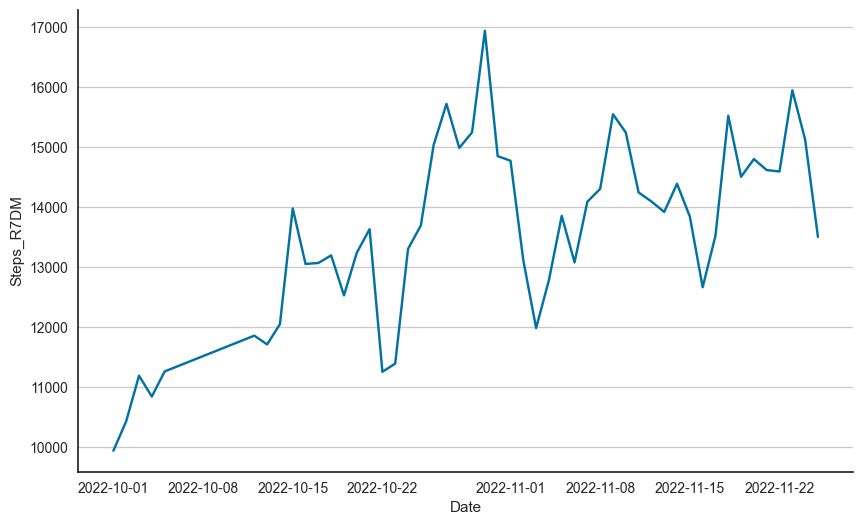

In [12]:
sns.lineplot(data=df, x='Date', y='Steps_R7DM')

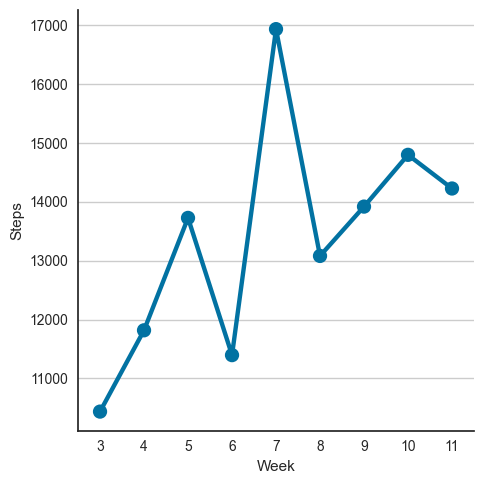

In [13]:
sns.catplot(data=df, x='Week', y='Steps', kind='point', errorbar=None)

<AxesSubplot: xlabel='Date', ylabel='SedentaryMinutes_R7DM'>

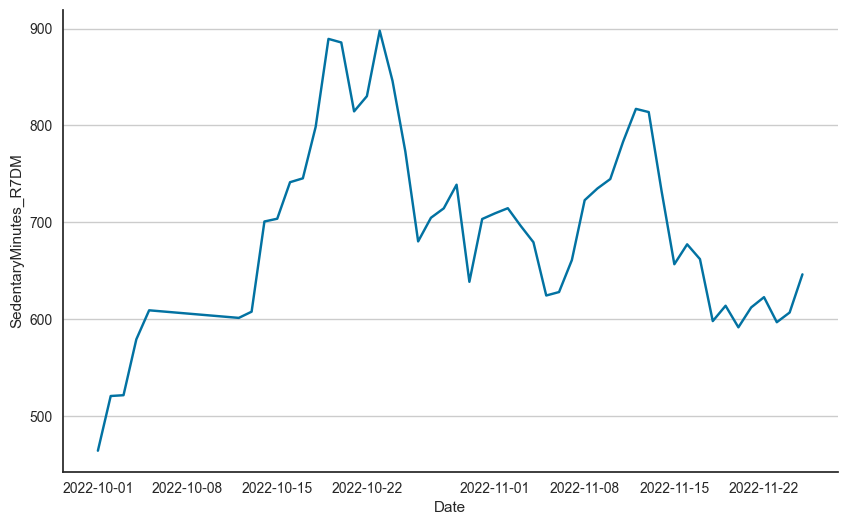

In [14]:
sns.lineplot(data=df, x='Date', y='SedentaryMinutes_R7DM')

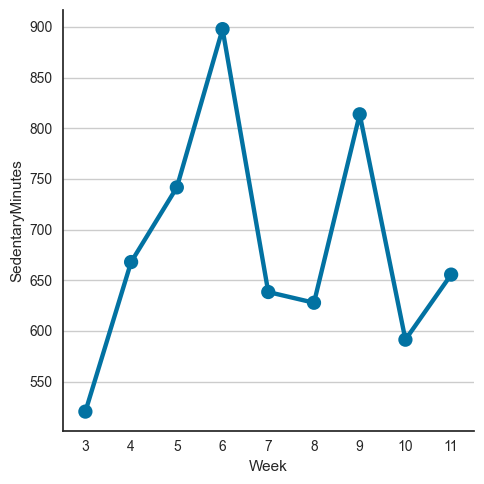

In [15]:
sns.catplot(data=df, x='Week', y='SedentaryMinutes', kind='point', errorbar=None)

<AxesSubplot: xlabel='Date', ylabel='VeryActiveMinutes_R7DM'>

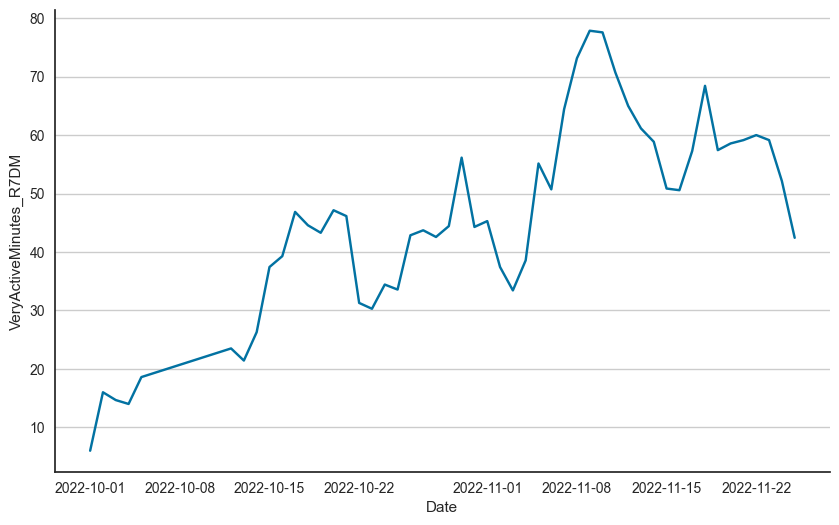

In [16]:
sns.lineplot(data=df, x='Date', y='VeryActiveMinutes_R7DM')

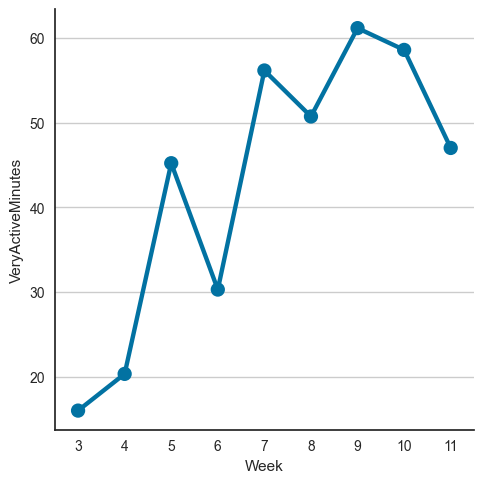

In [17]:
sns.catplot(data=df, x='Week', y='VeryActiveMinutes', kind='point', errorbar=None)

### SleepScore Data

<AxesSubplot: xlabel='Date', ylabel='SS_SOL_R7DM'>

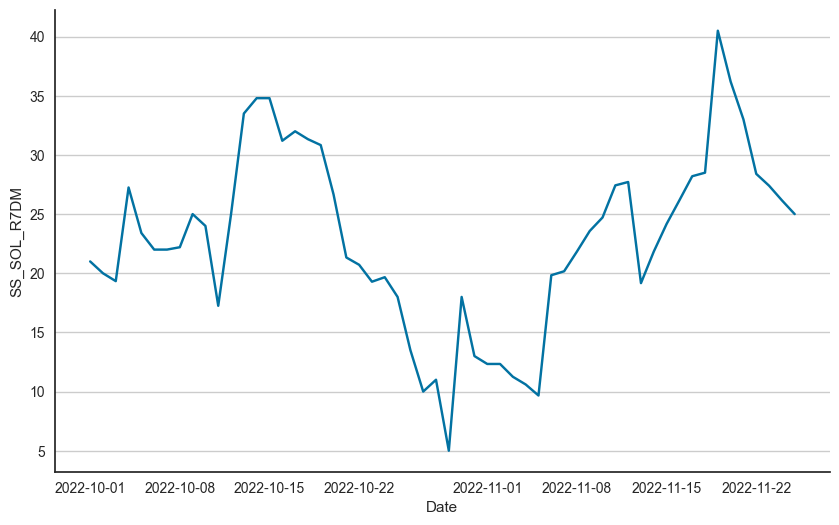

In [18]:
sns.lineplot(data=df, x='Date', y='SS_SOL_R7DM')

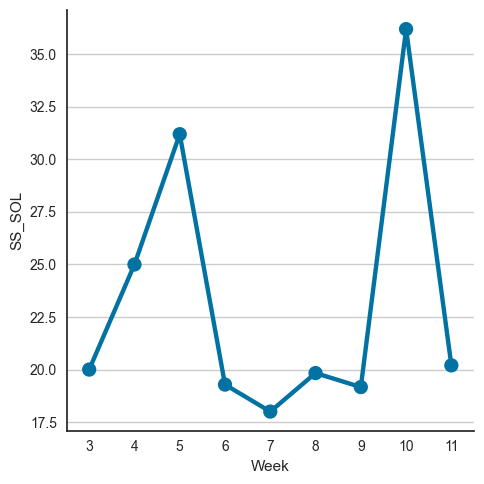

In [19]:
sns.catplot(data=df, x='Week', y='SS_SOL', kind='point', errorbar=None)

<AxesSubplot: xlabel='Date', ylabel='SS_Onset_R7DM'>

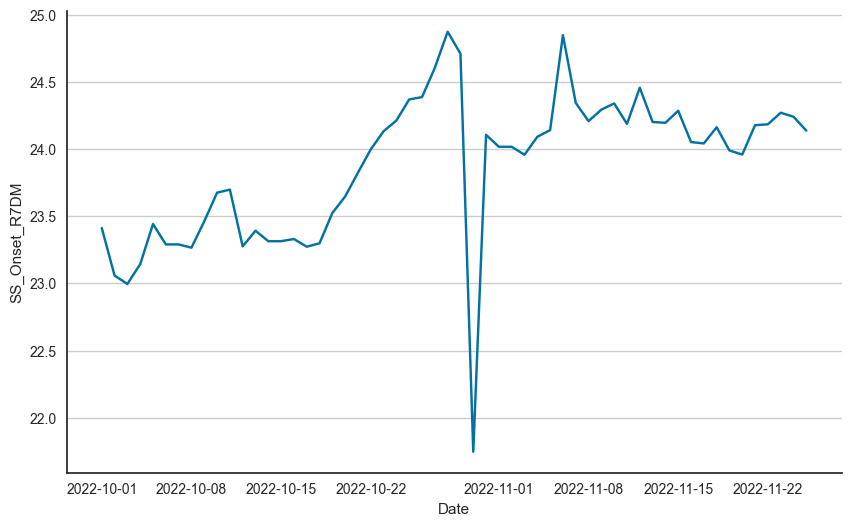

In [20]:
sns.lineplot(data=df, x='Date', y='SS_Onset_R7DM')

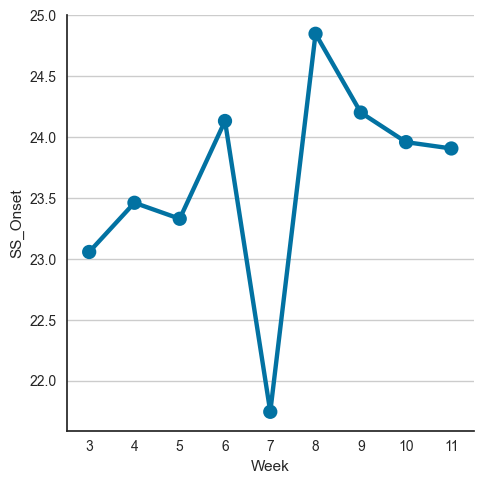

In [21]:
sns.catplot(data=df, x='Week', y='SS_Onset', kind='point', errorbar=None)

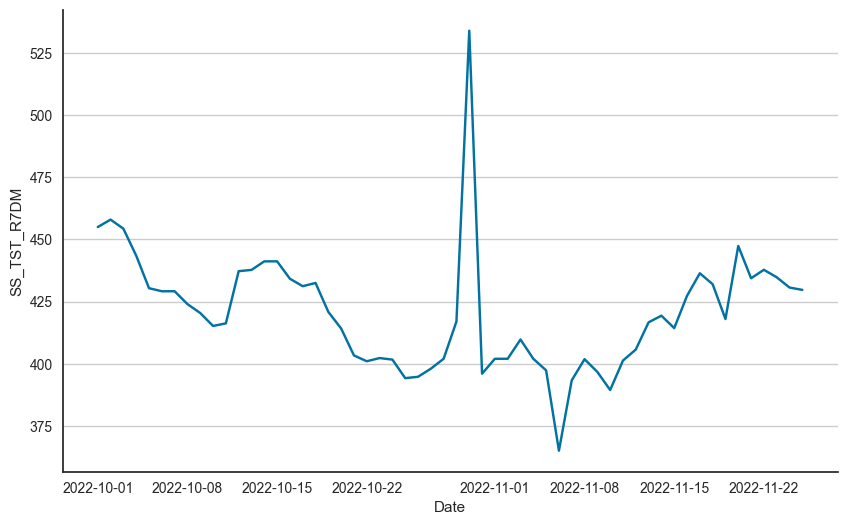

In [22]:
sns.lineplot(data=df, x='Date', y='SS_TST_R7DM');

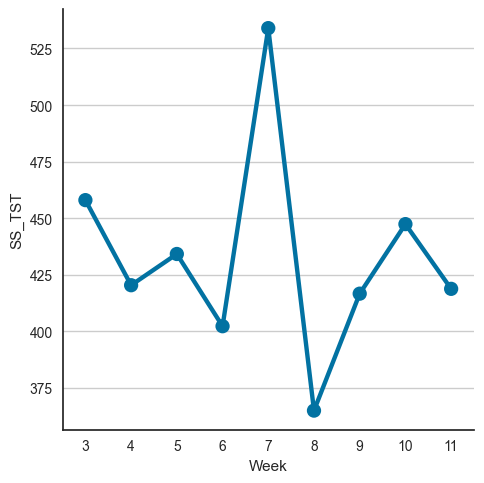

In [23]:
sns.catplot(data=df, x='Week', y='SS_TST', kind='point', errorbar=None)

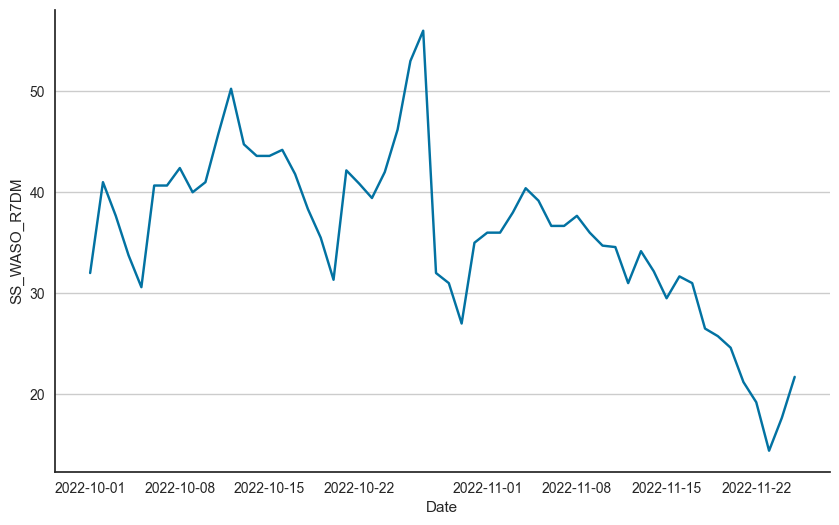

In [24]:
sns.lineplot(data=df, x='Date', y='SS_WASO_R7DM');

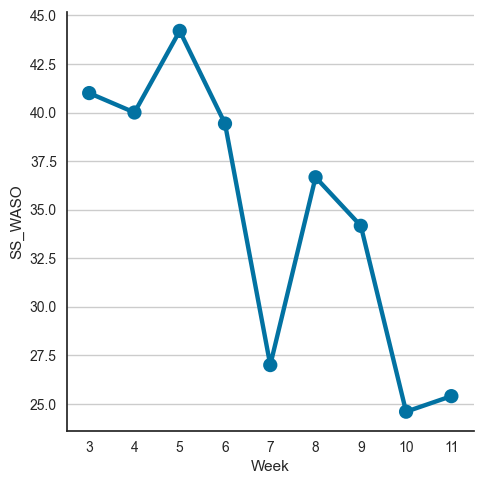

In [25]:
sns.catplot(data=df, x='Week', y='SS_WASO', kind='point', errorbar=None);

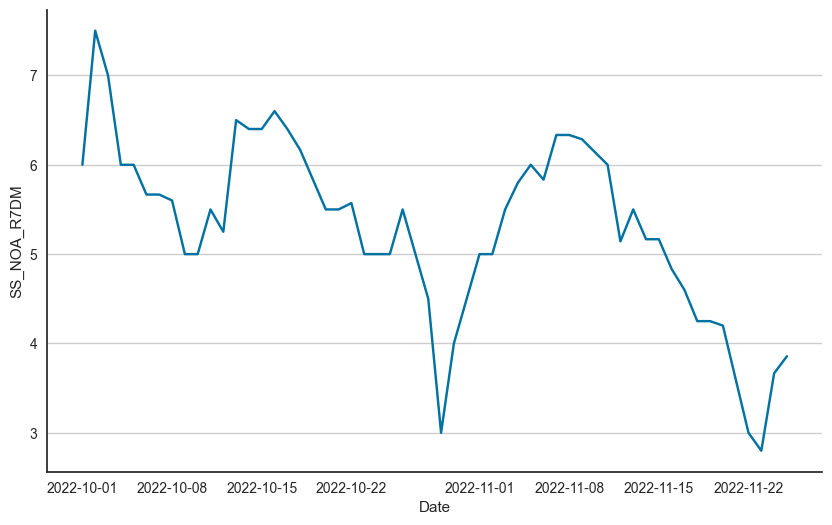

In [26]:
sns.lineplot(data=df, x='Date', y='SS_NOA_R7DM');

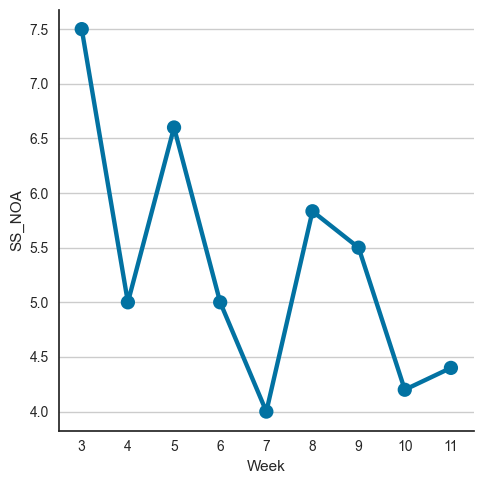

In [27]:
sns.catplot(data=df, x='Week', y='SS_NOA', kind='point', errorbar=None);

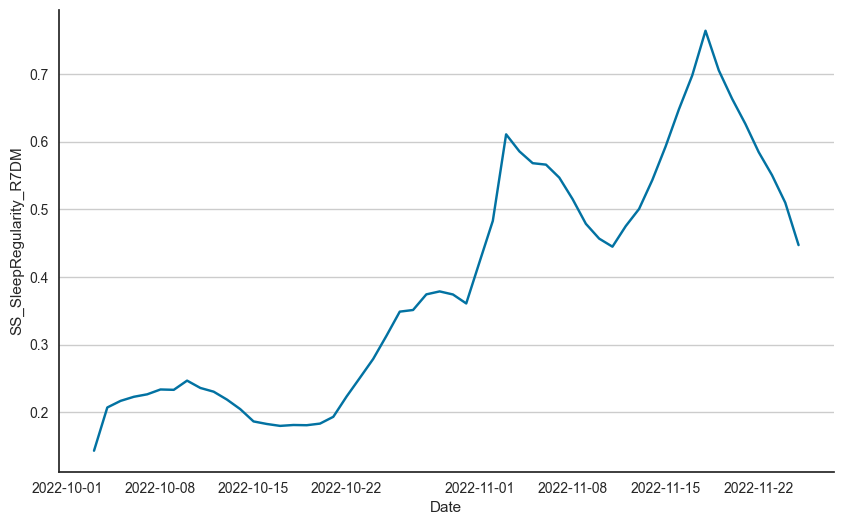

In [28]:
sns.lineplot(data=df, x='Date', y='SS_SleepRegularity_R7DM');

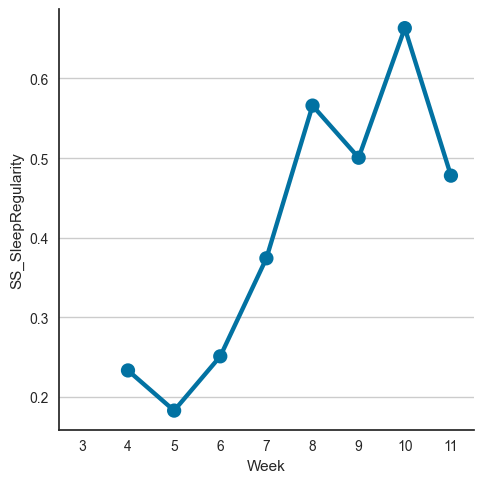

In [29]:
sns.catplot(data=df, x='Week', y='SS_SleepRegularity', kind='point', errorbar=None);

### Mood and Daily Log

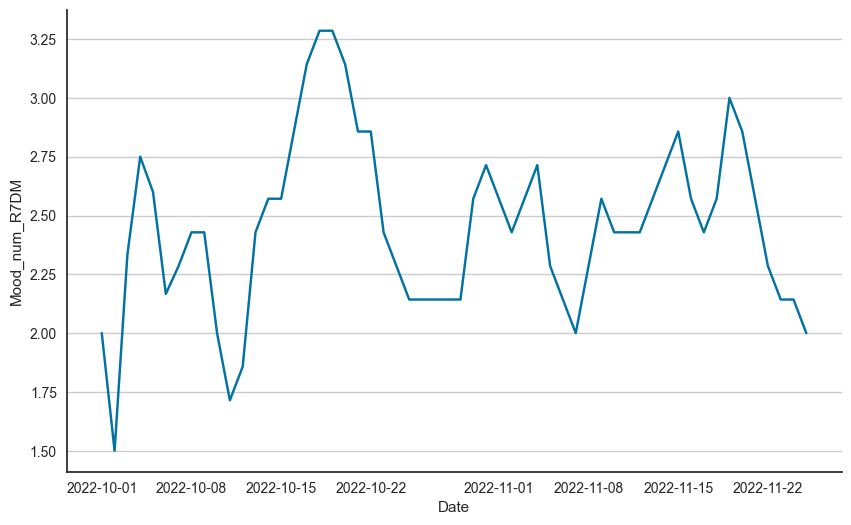

In [30]:
sns.lineplot(data=df, x='Date', y='Mood_num_R7DM');

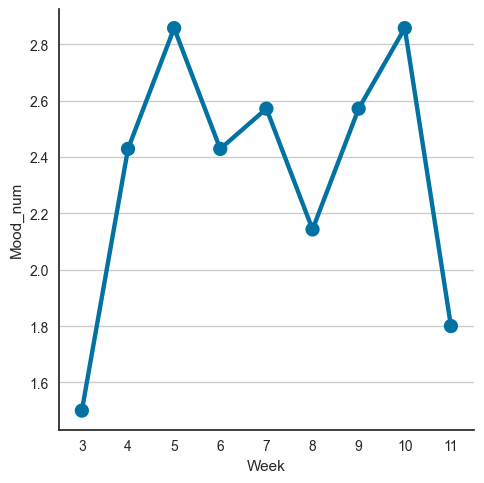

In [31]:
sns.catplot(data=df, x='Week', y='Mood_num', kind='point', errorbar=None);

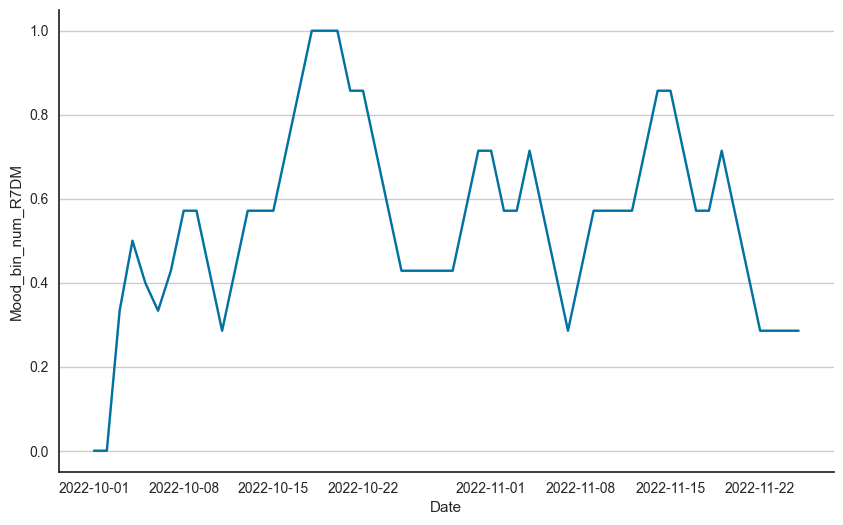

In [32]:
sns.lineplot(data=df, x='Date', y='Mood_bin_num_R7DM');

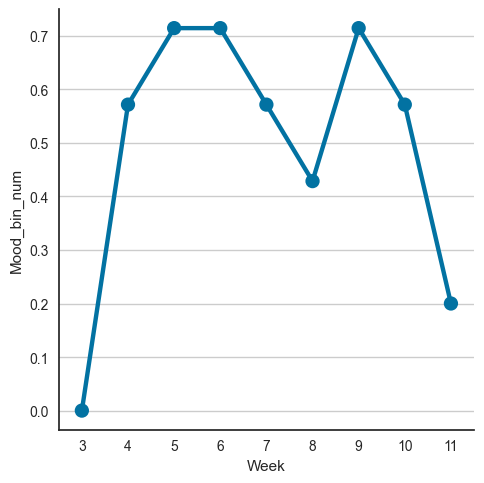

In [33]:
sns.catplot(data=df, x='Week', y='Mood_bin_num', kind='point', errorbar=None);

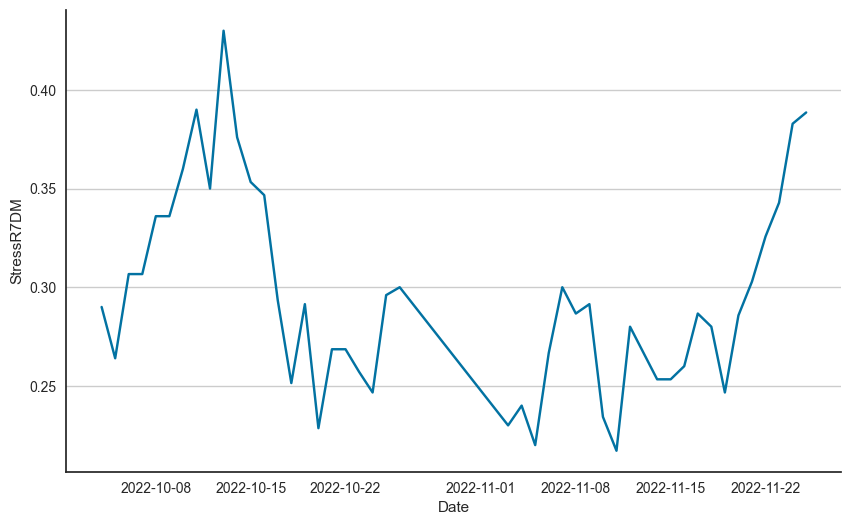

In [34]:
sns.lineplot(data=df, x='Date', y='StressR7DM');

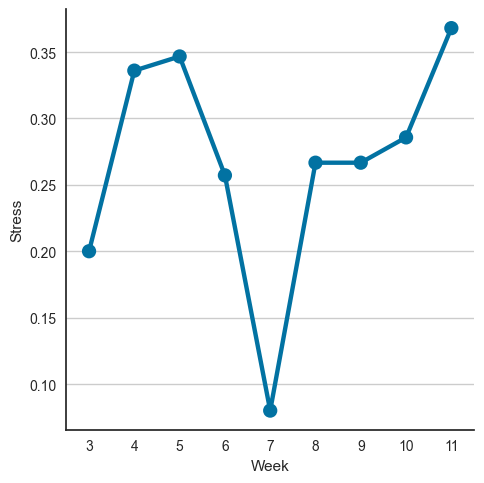

In [35]:
sns.catplot(data=df, x='Week', y='Stress', kind='point', errorbar=None);

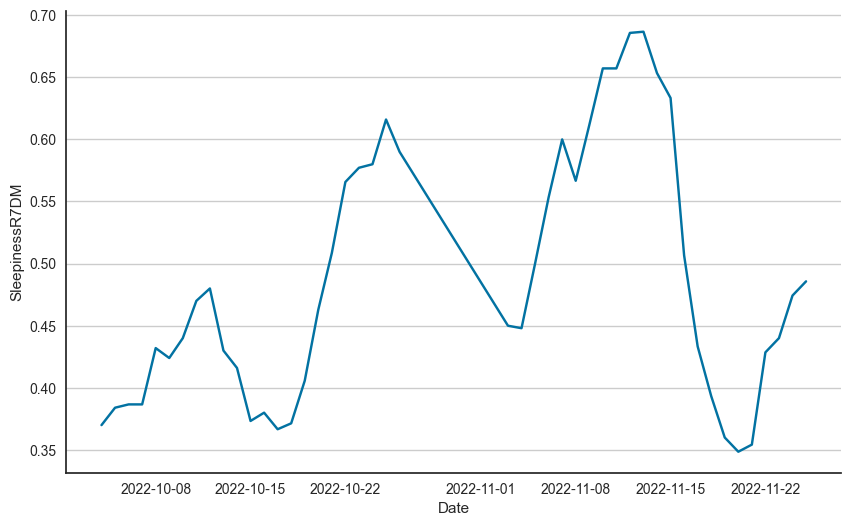

In [36]:
sns.lineplot(data=df, x='Date', y='SleepinessR7DM');

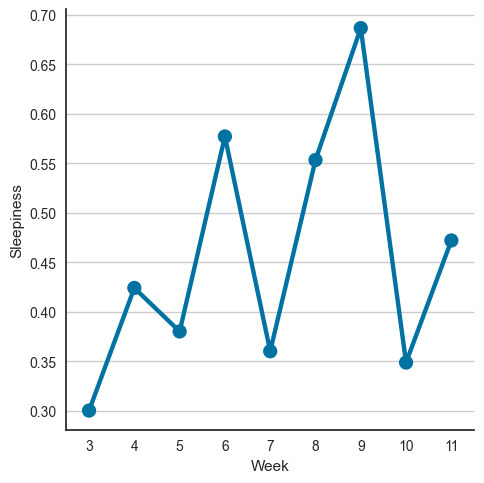

In [37]:
sns.catplot(data=df, x='Week', y='Sleepiness', kind='point', errorbar=None);

## Comparing Good and Bad Days

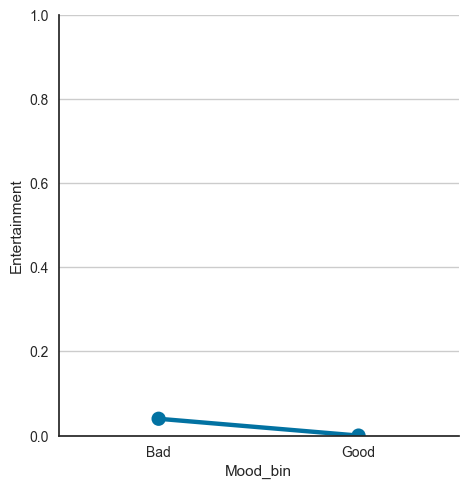

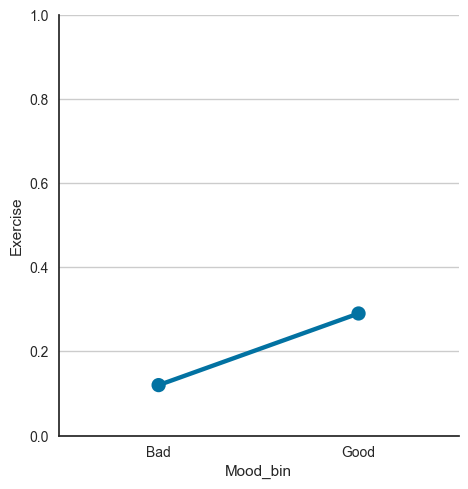

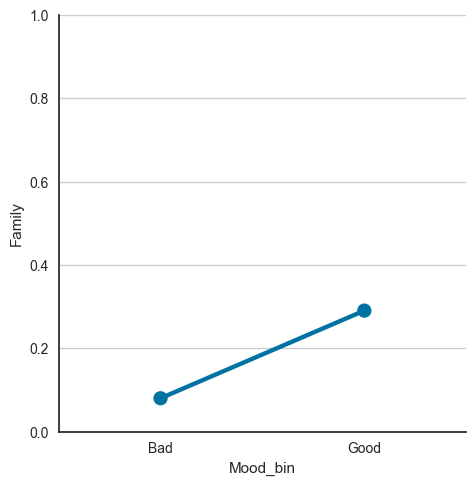

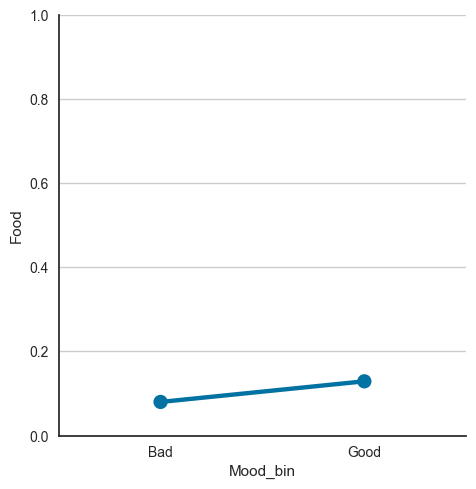

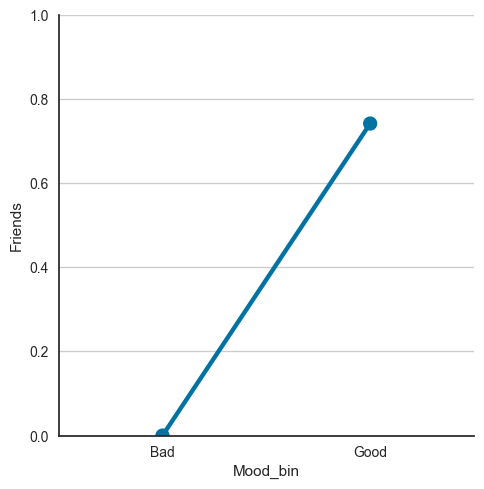

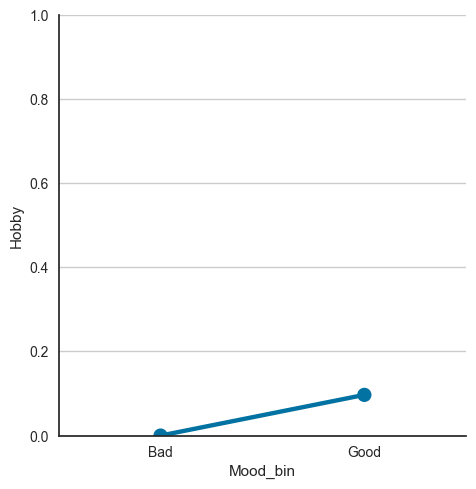

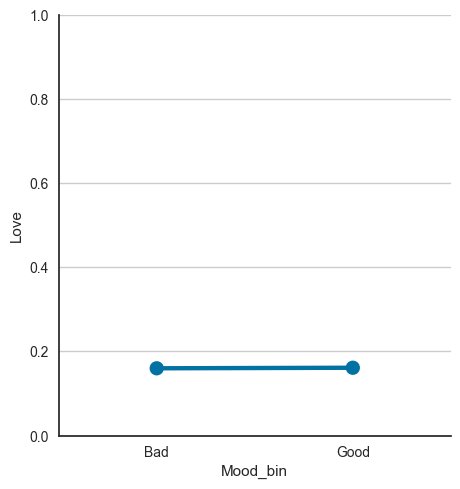

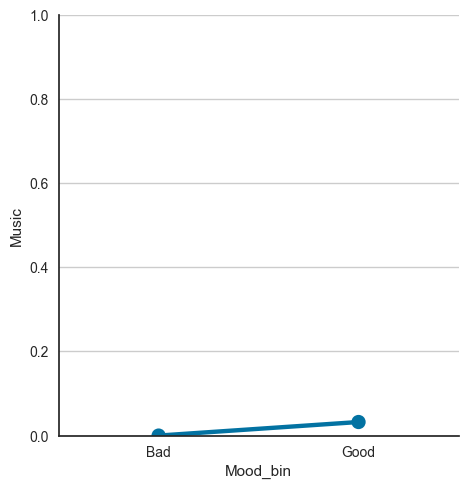

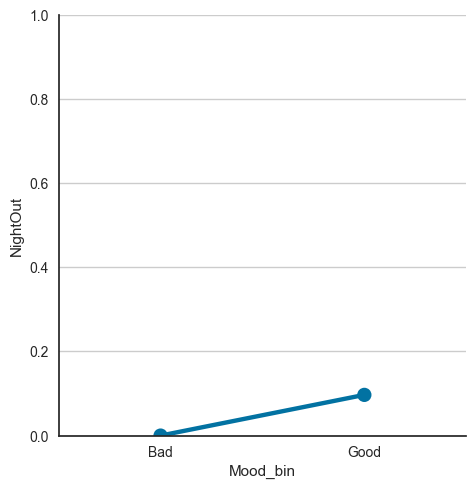

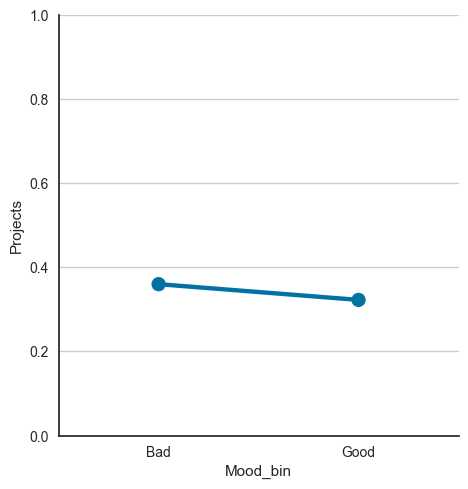

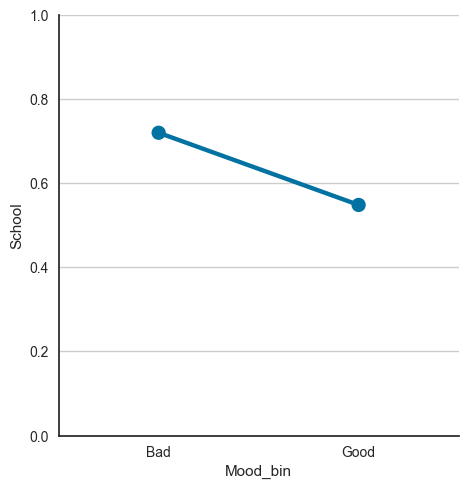

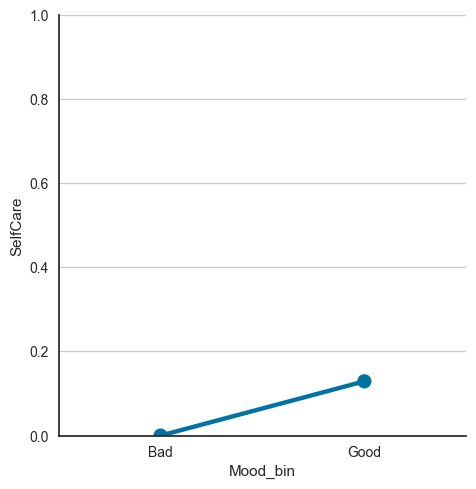

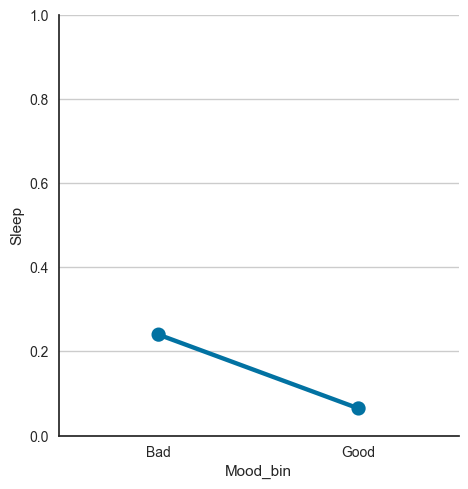

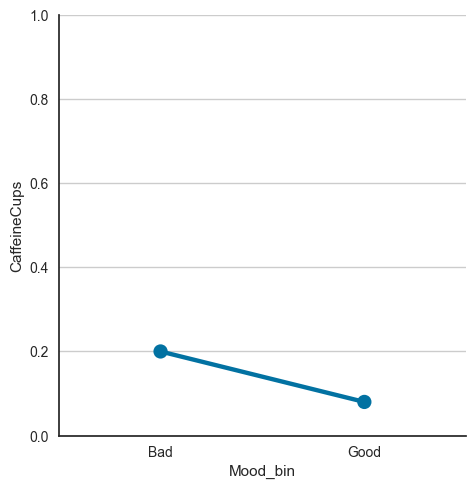

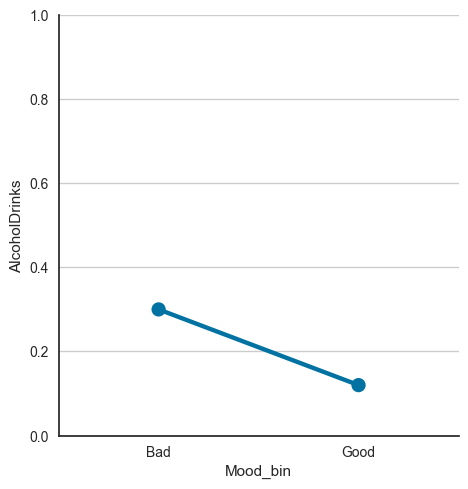

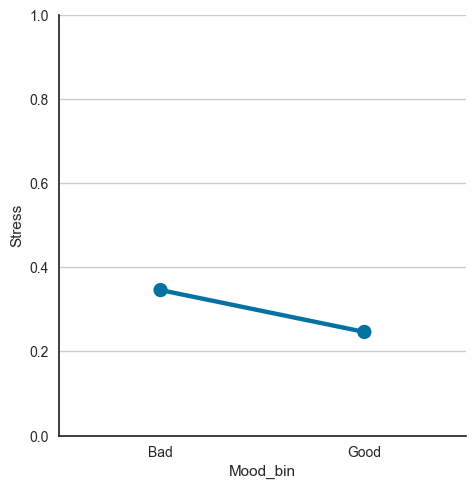

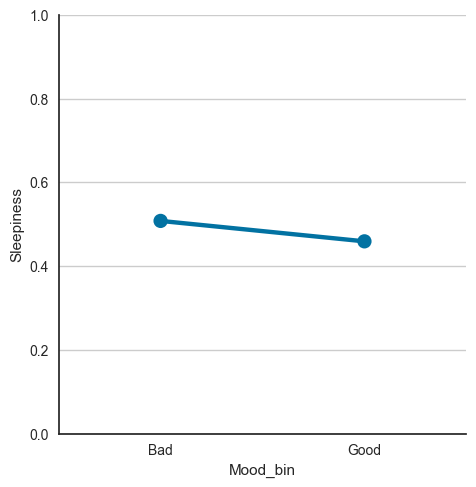

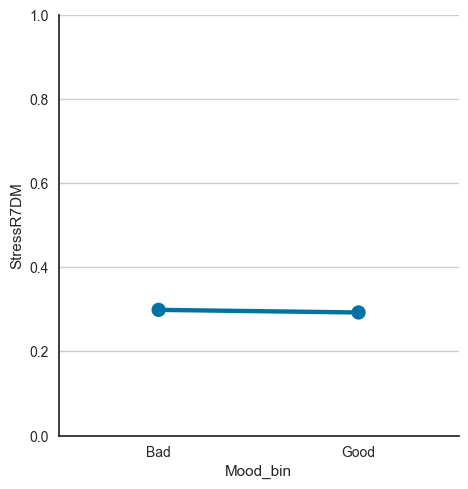

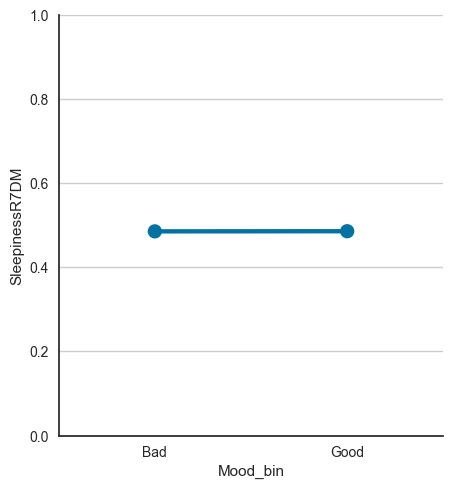

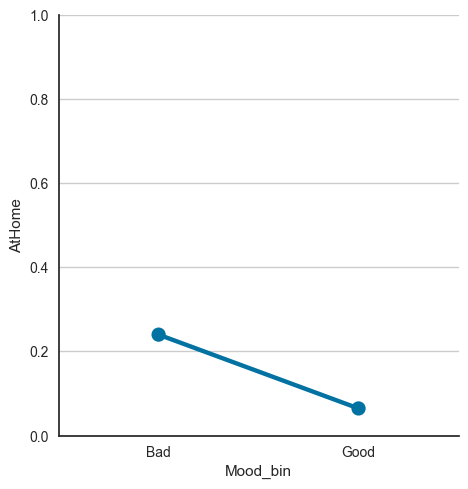

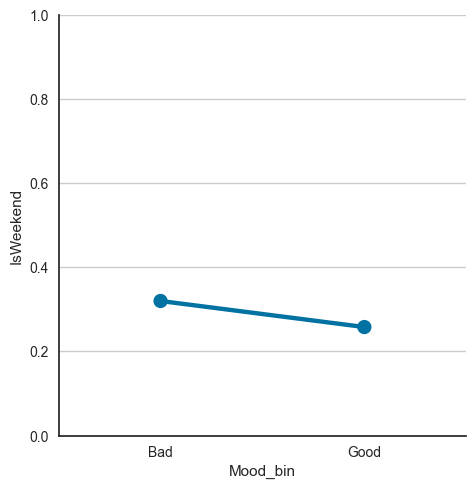

In [38]:
for col in ['Entertainment', 'Exercise', 'Family', 'Food', 'Friends', 'Hobby',
       'Love', 'Music', 'NightOut', 'Projects', 'School', 'SelfCare', 'Sleep',
       'CaffeineCups', 'AlcoholDrinks', 'Stress', 'Sleepiness', 'StressR7DM', 'SleepinessR7DM', 'AtHome',
       'IsWeekend']:
    sns.catplot(data=df, x='Mood_bin', y=col, kind='point', errorbar=None)
    plt.ylim(0, 1)
    plt.savefig(f'./../visuals/Mood_bin_{col}.png');

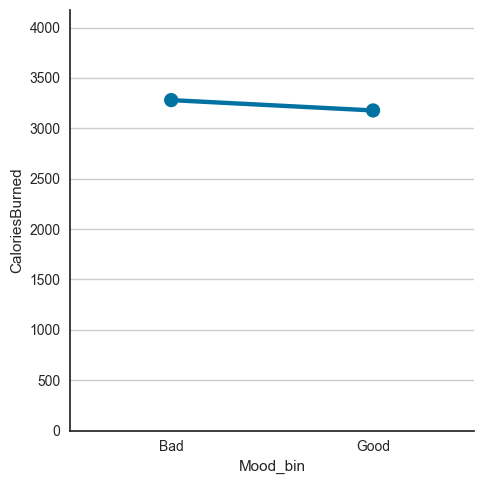

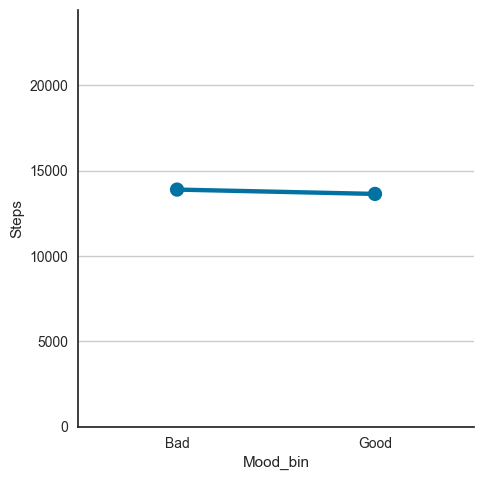

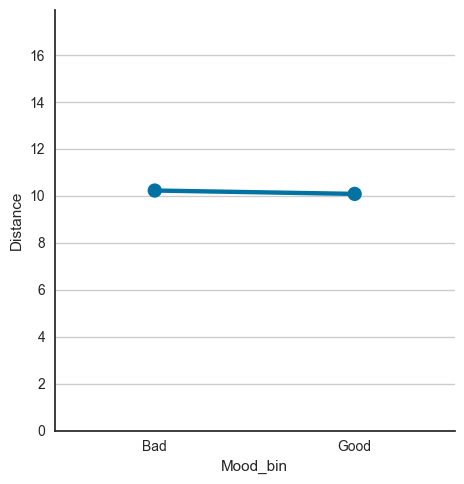

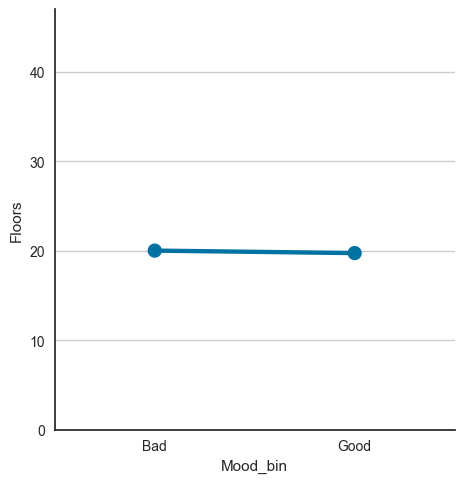

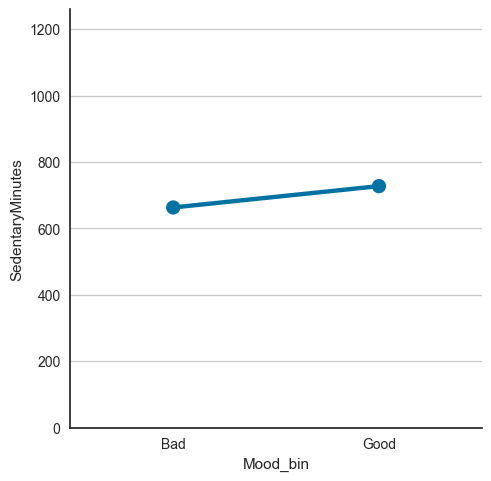

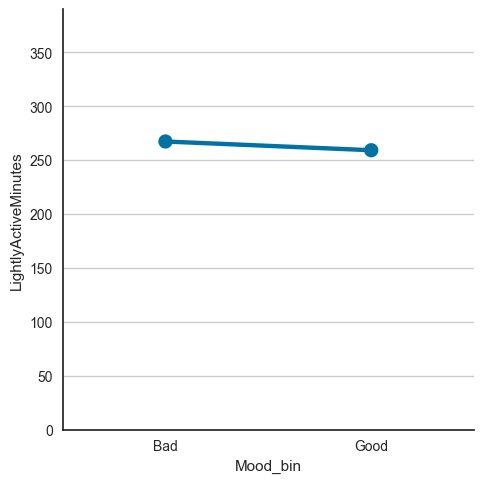

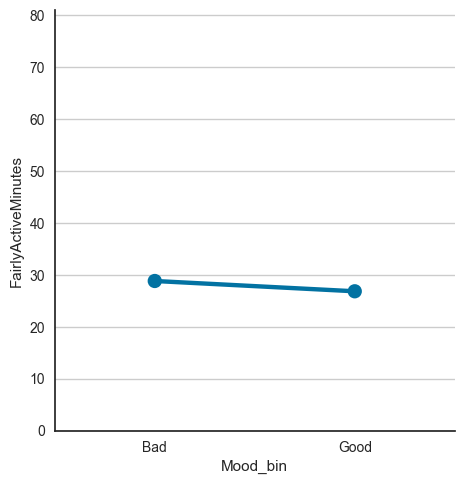

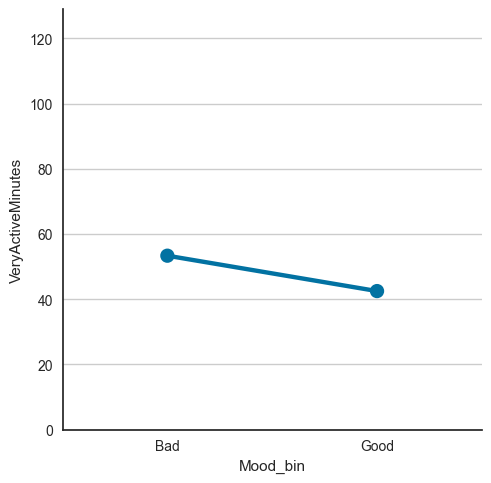

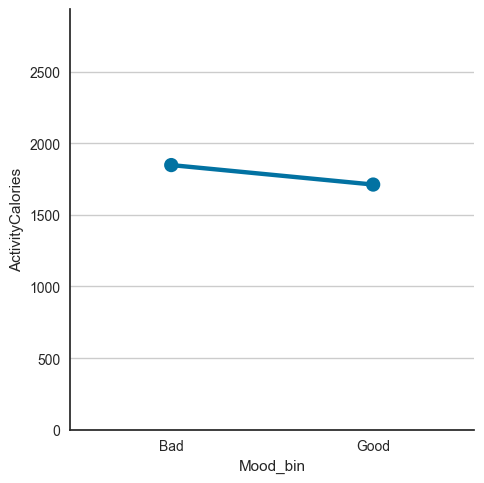

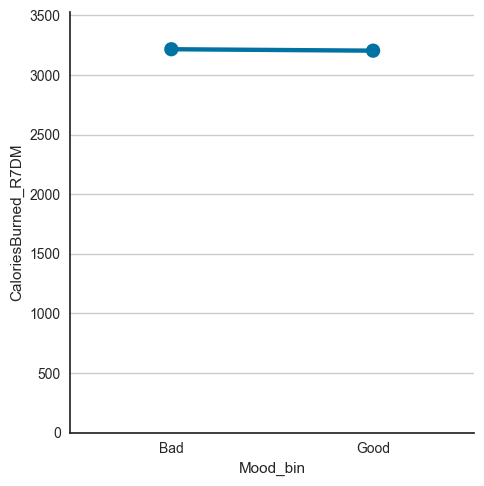

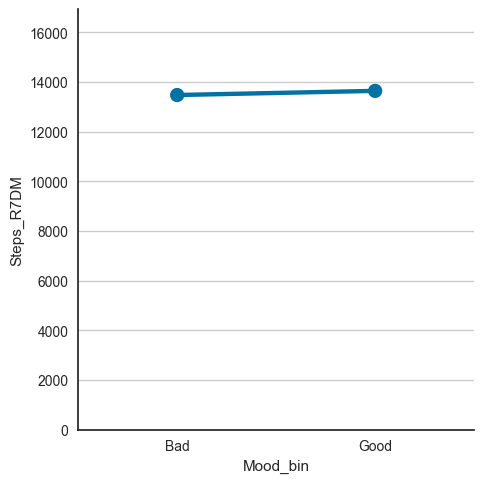

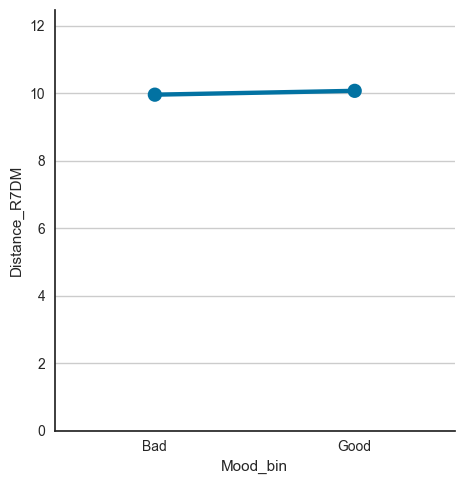

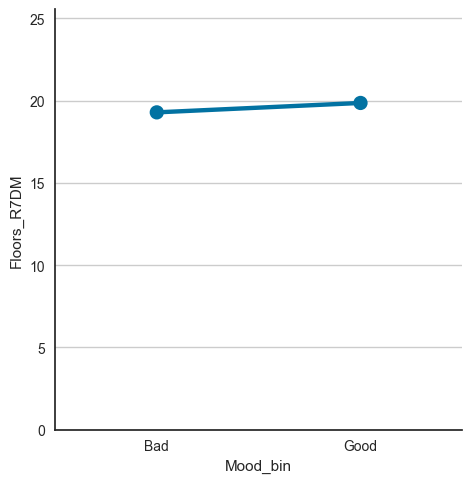

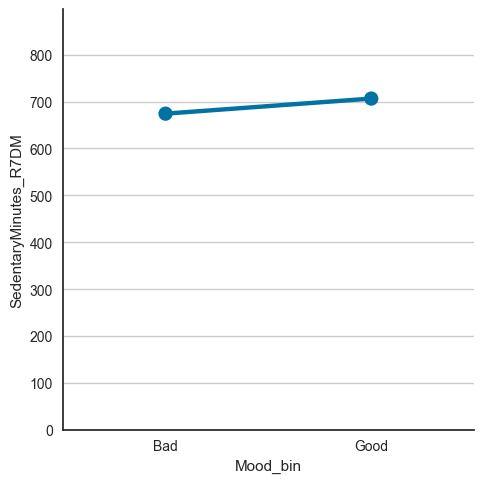

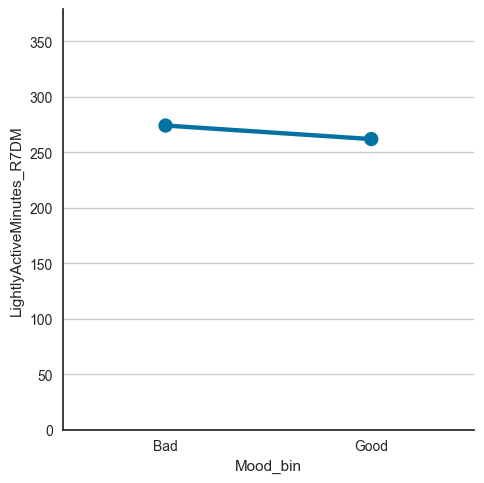

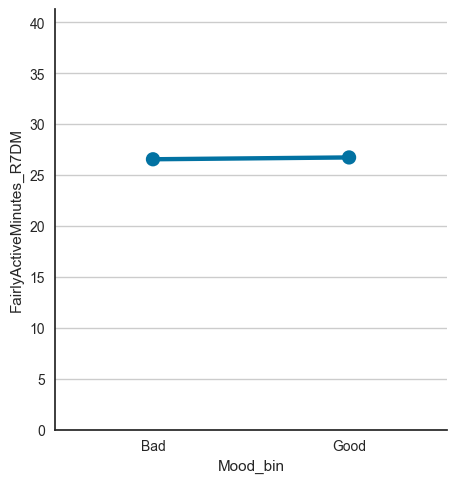

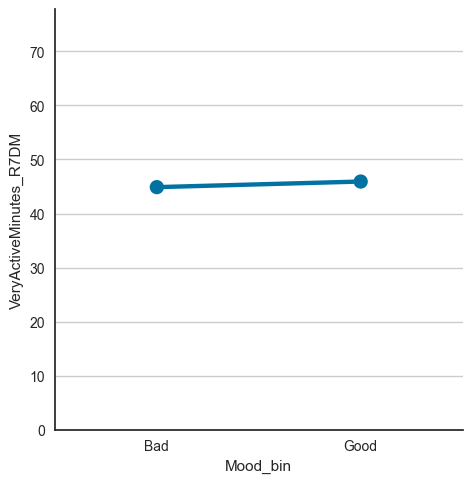

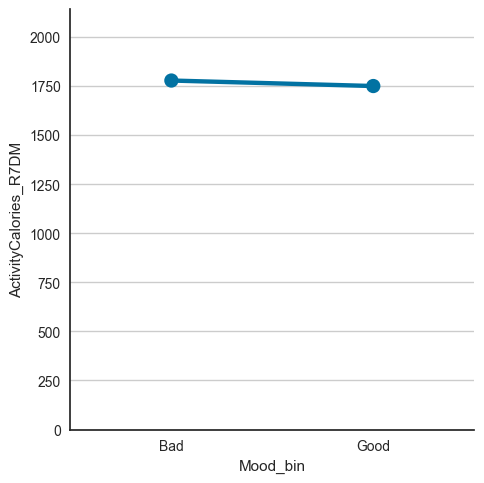

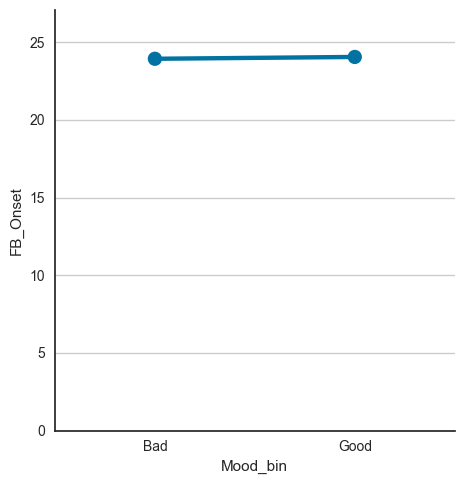

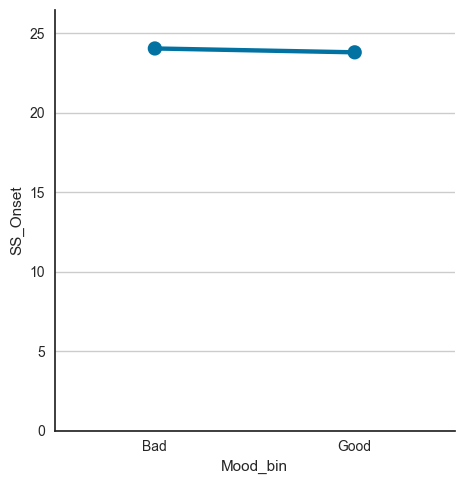

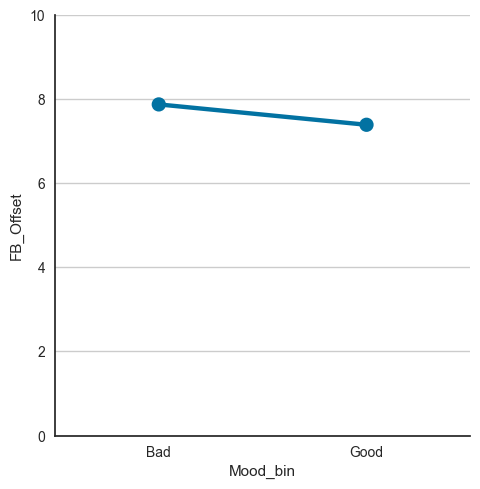

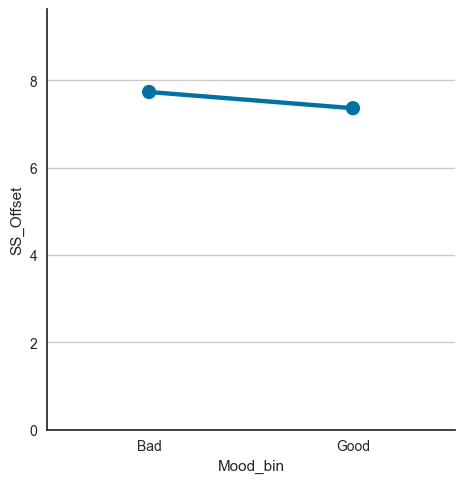

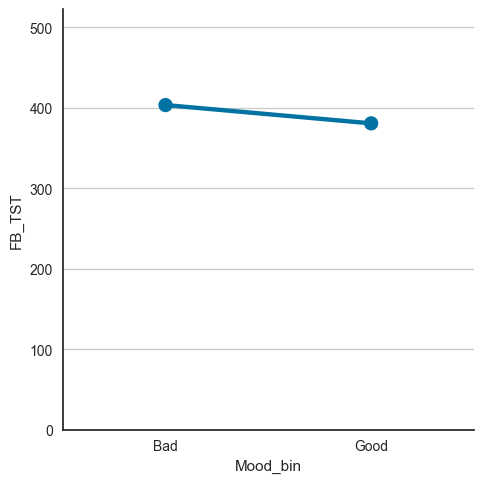

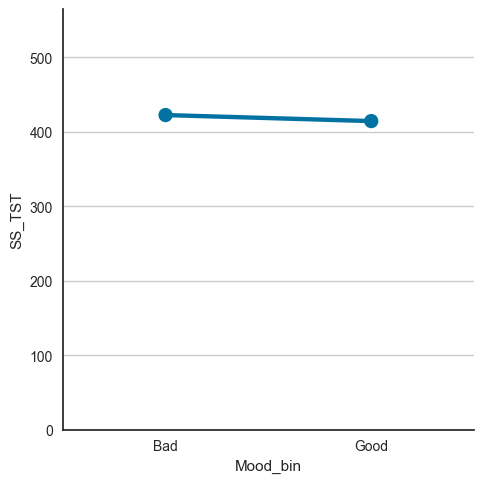

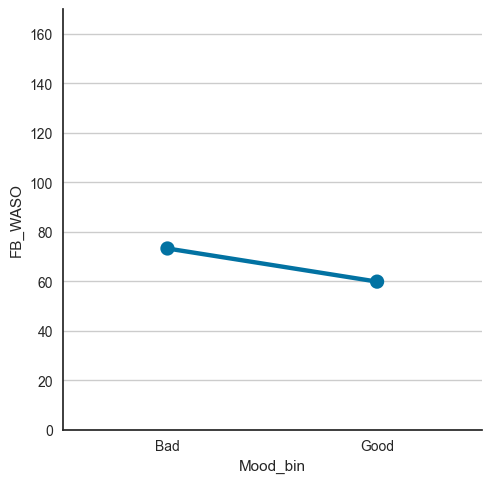

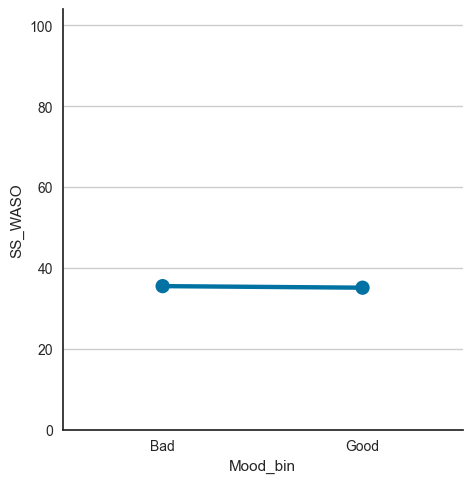

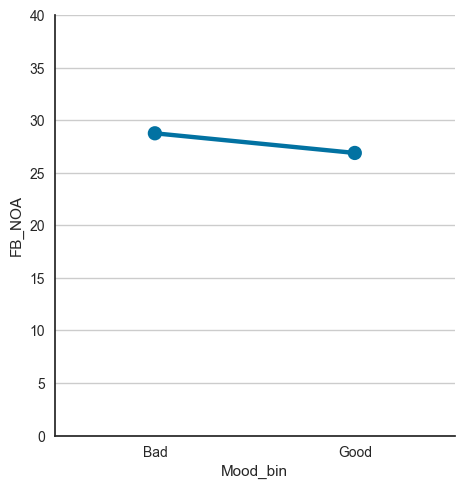

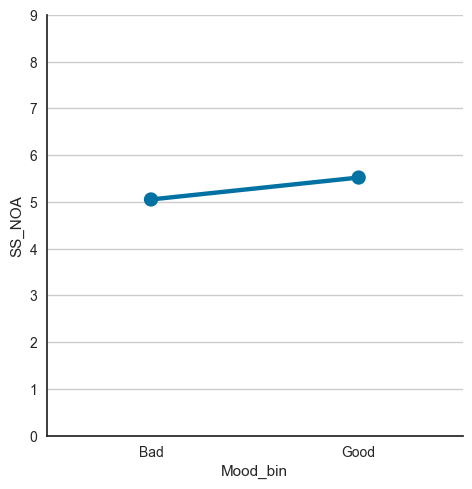

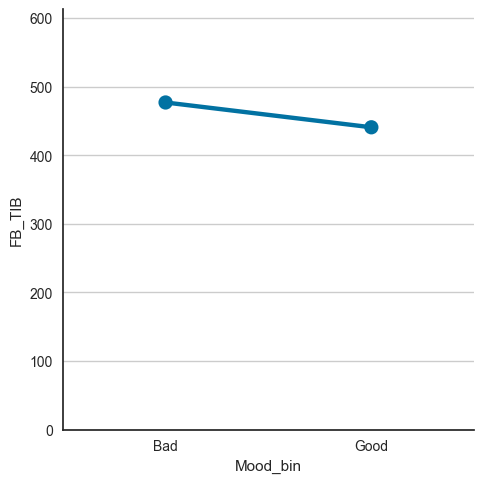

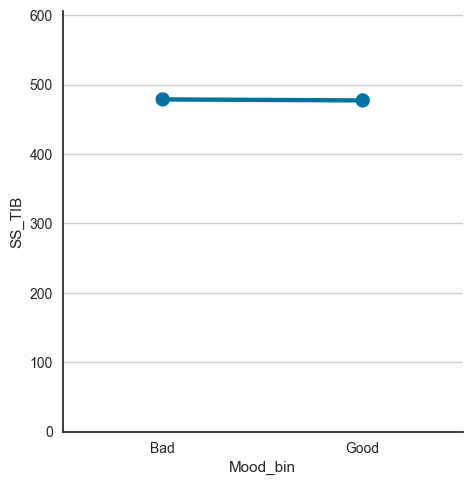

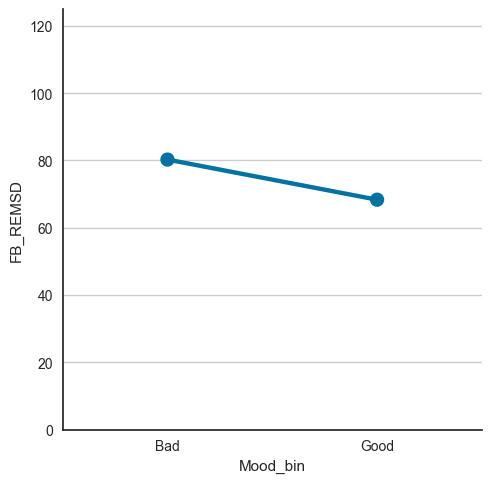

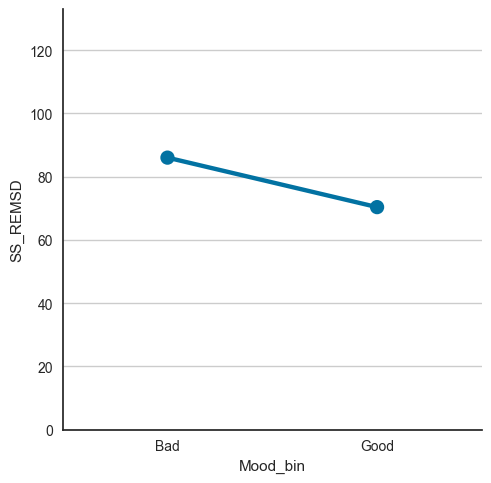

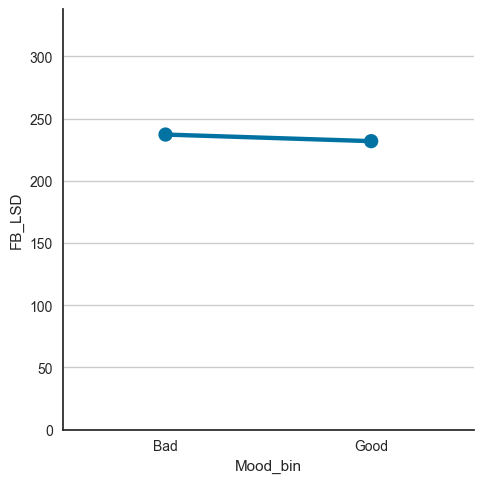

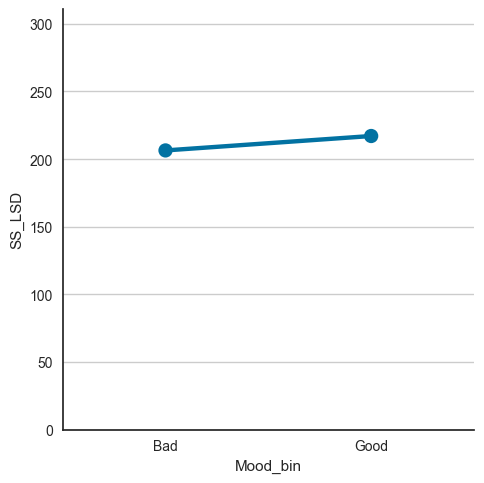

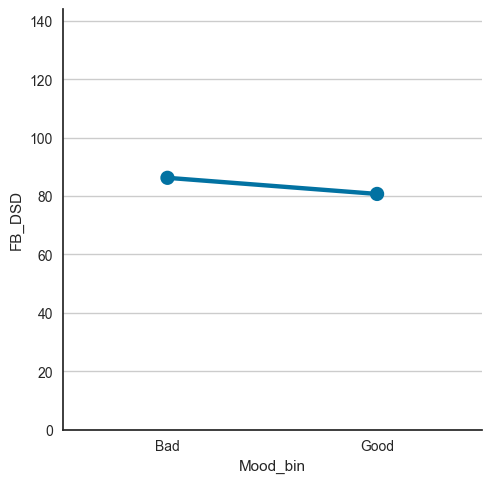

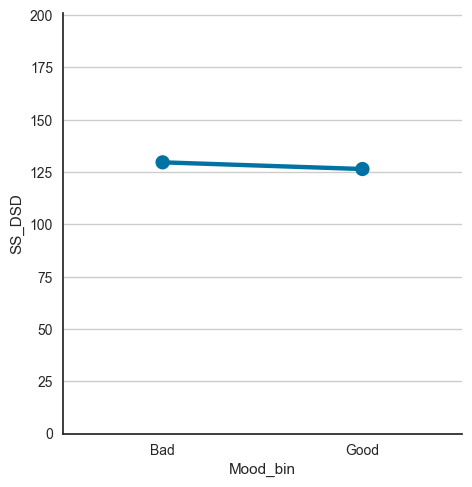

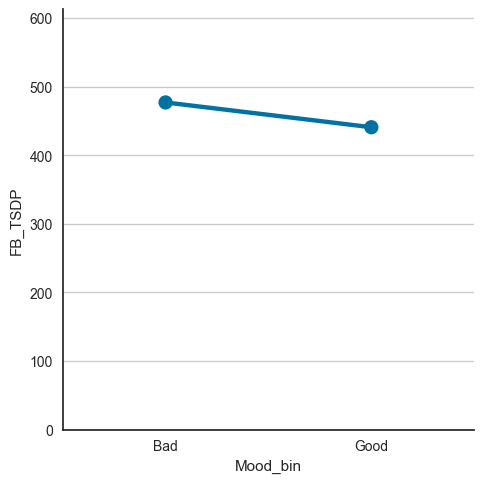

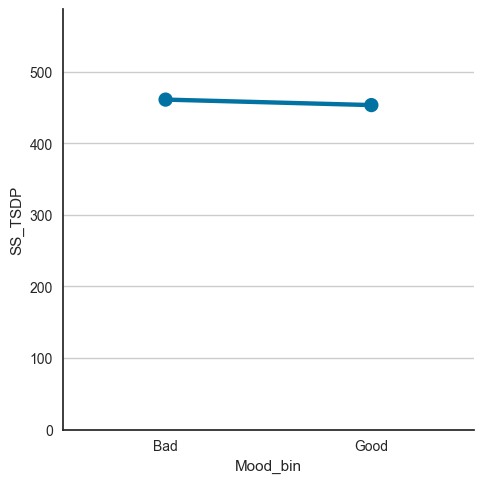

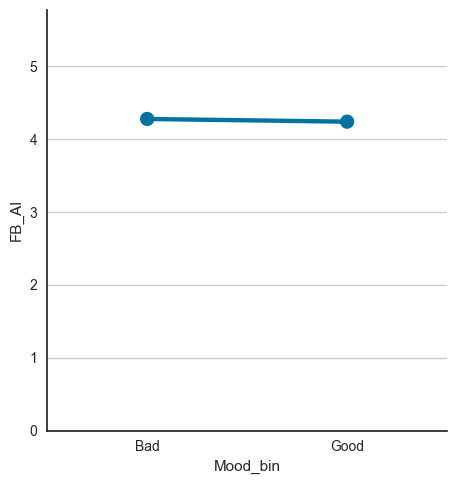

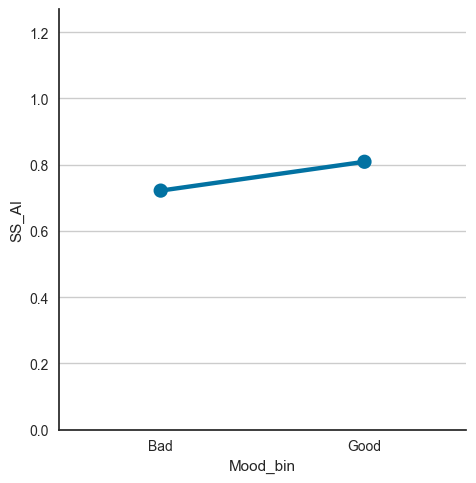

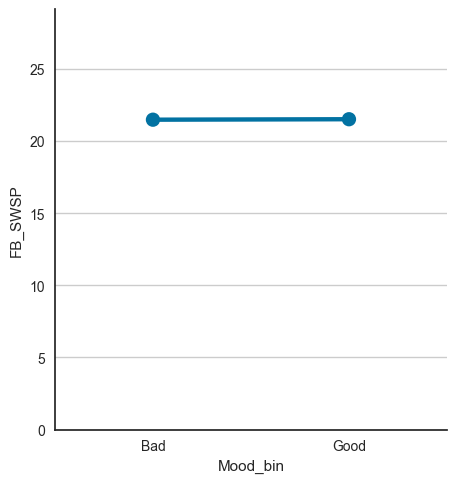

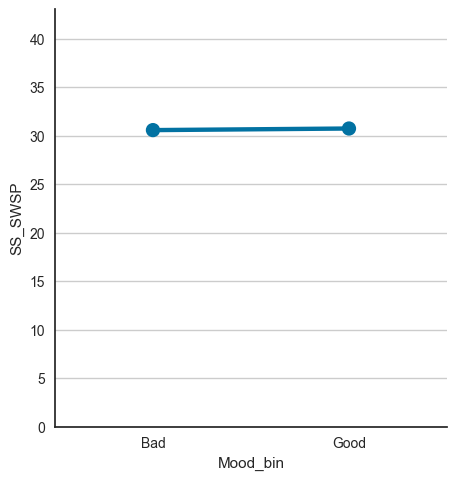

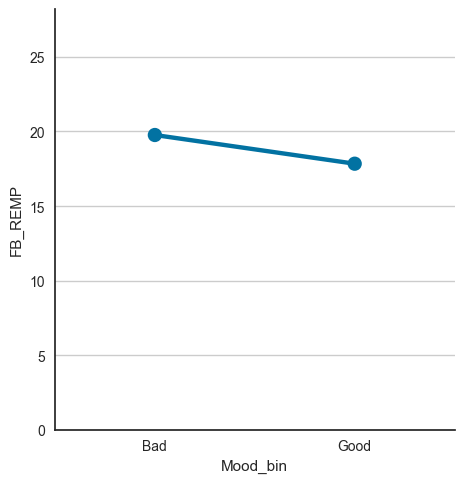

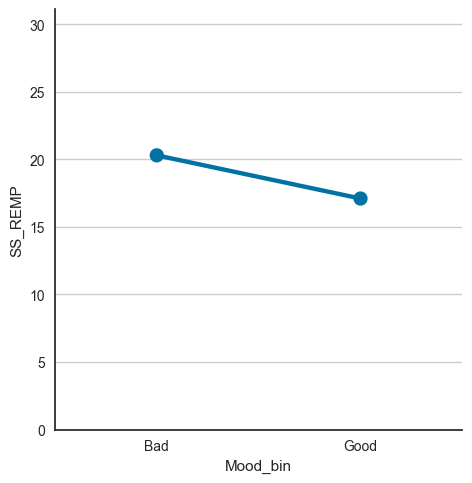

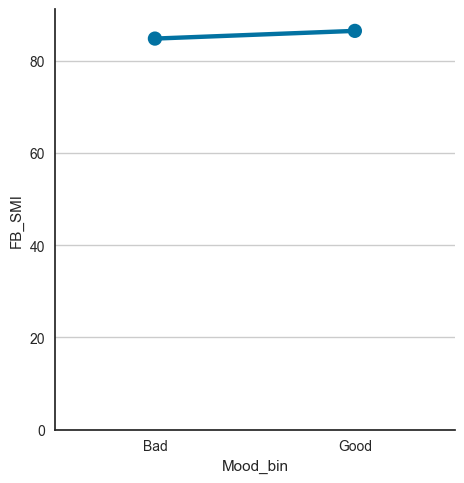

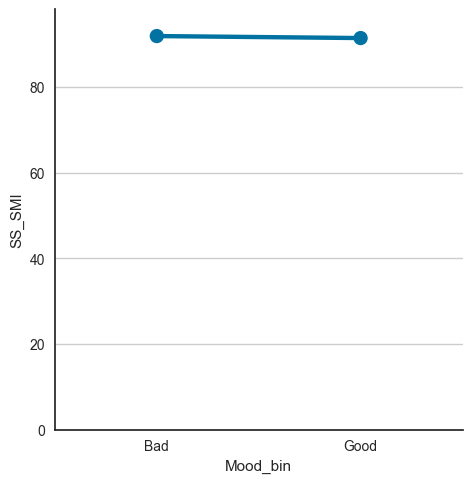

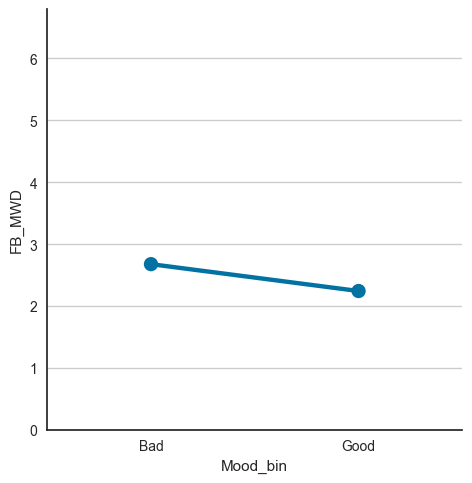

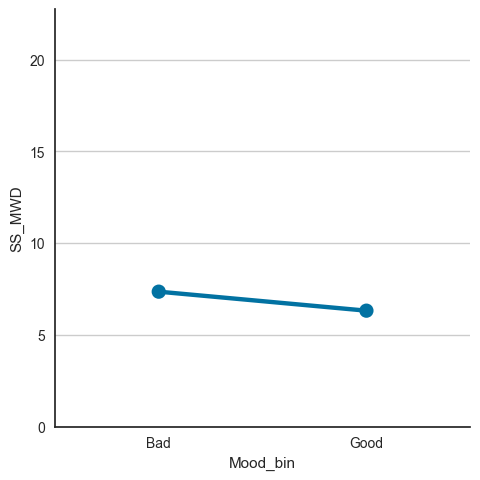

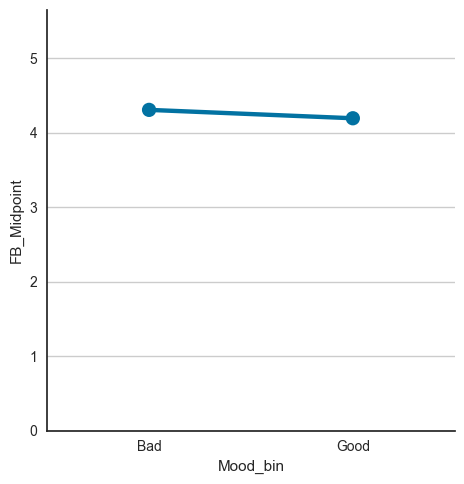

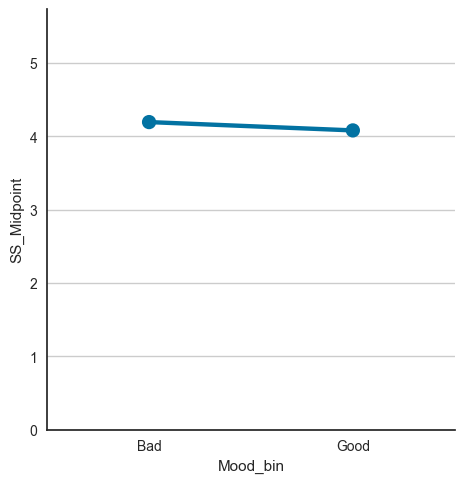

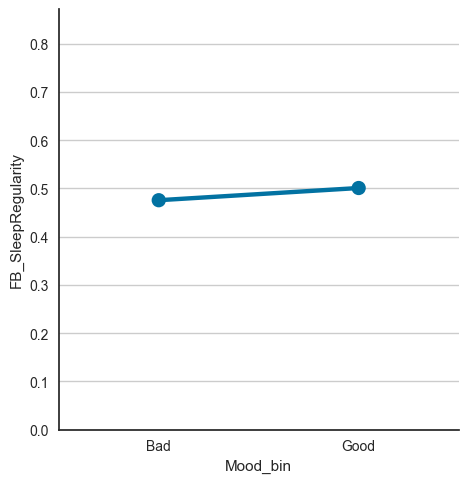

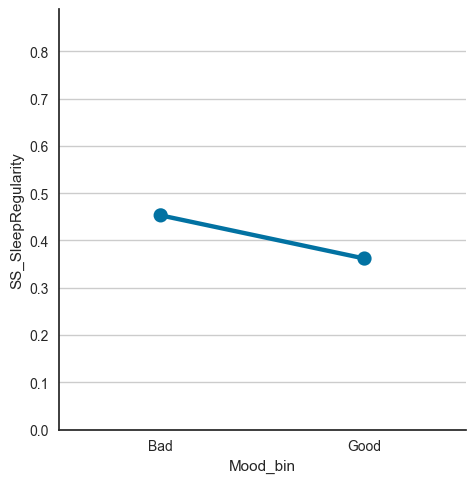

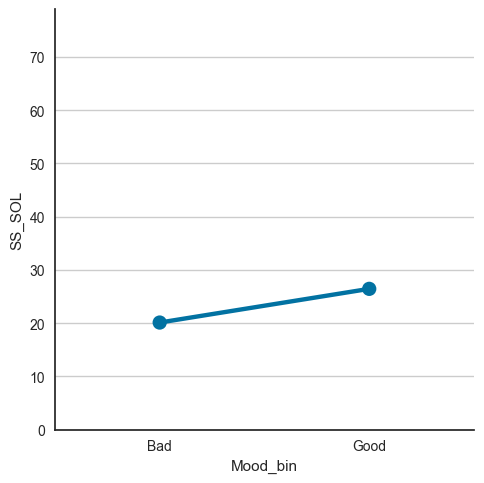

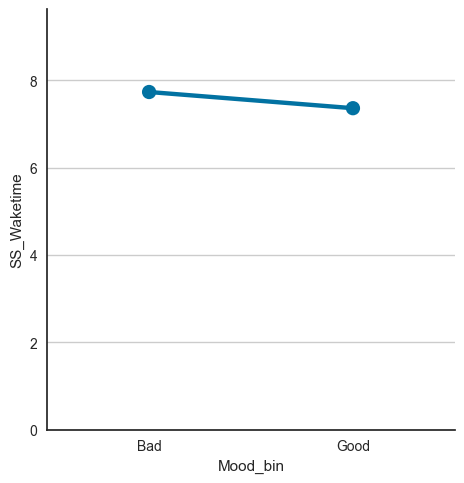

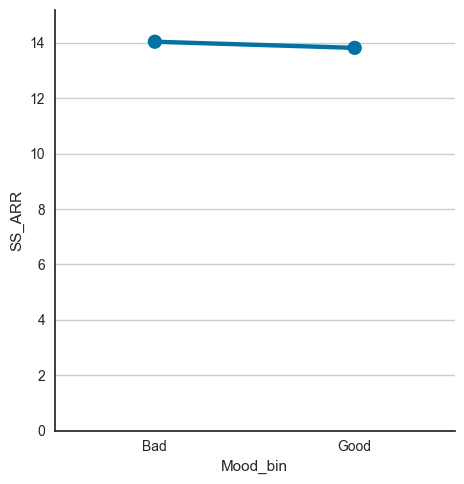

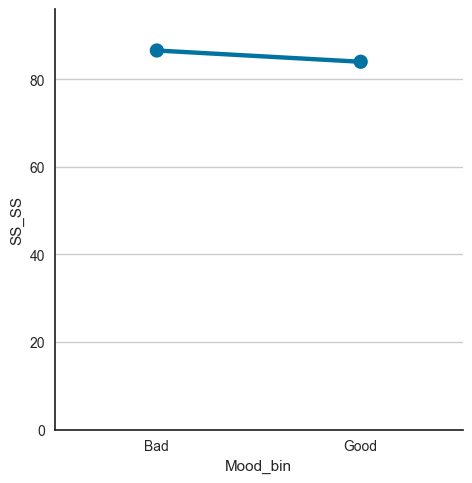

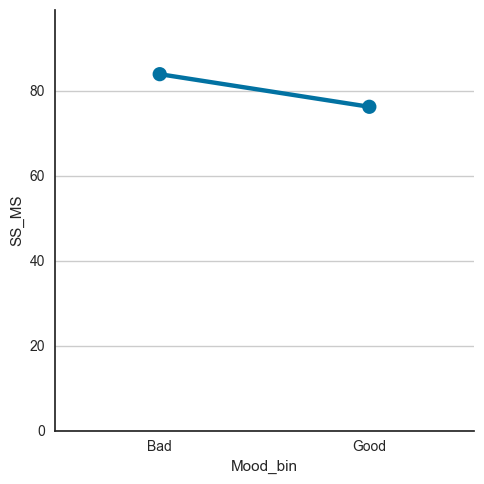

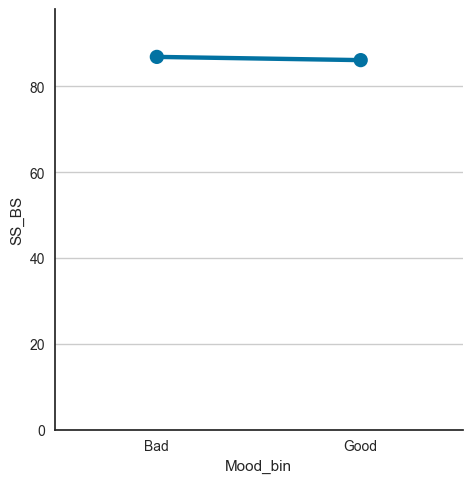

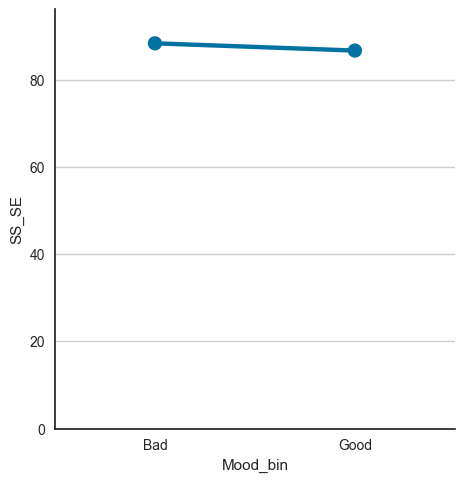

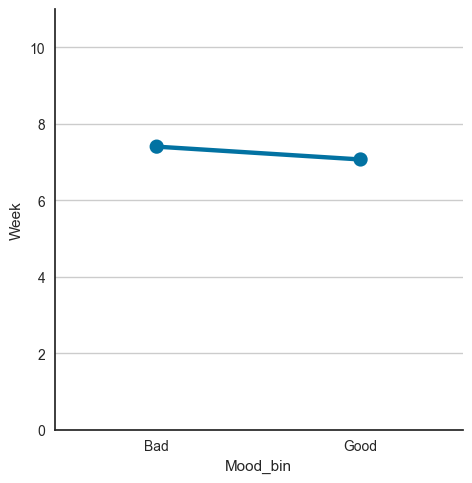

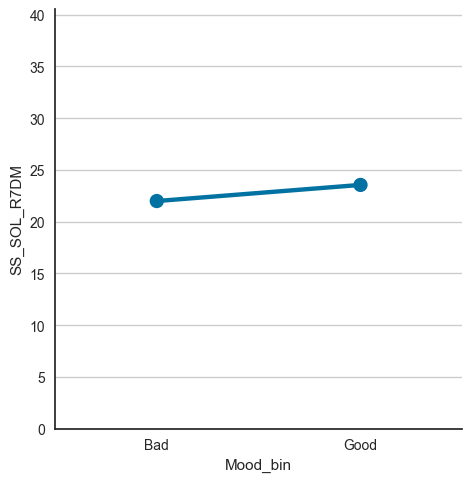

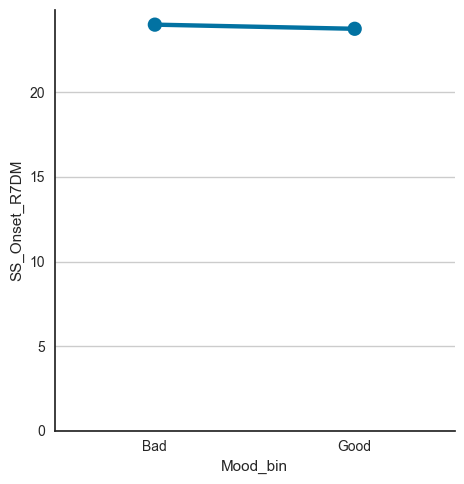

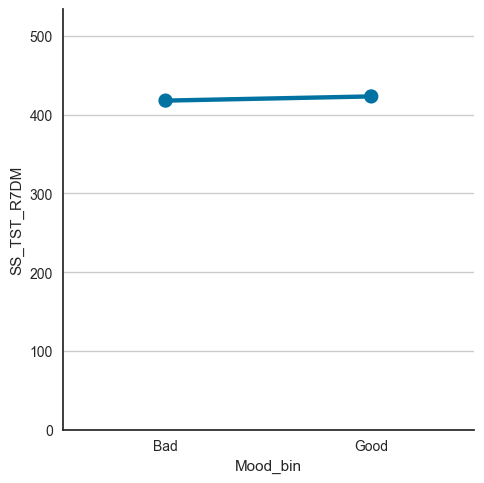

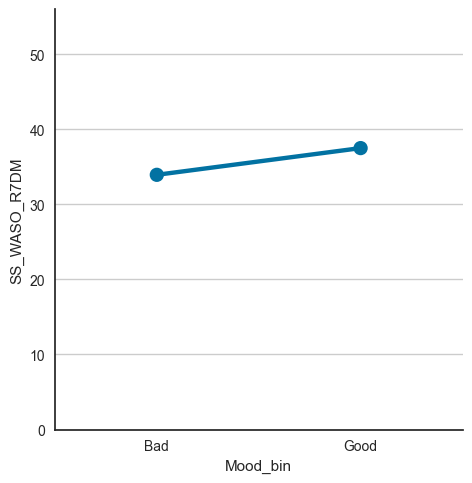

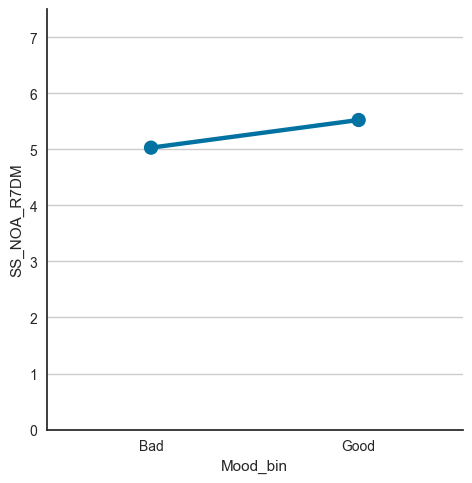

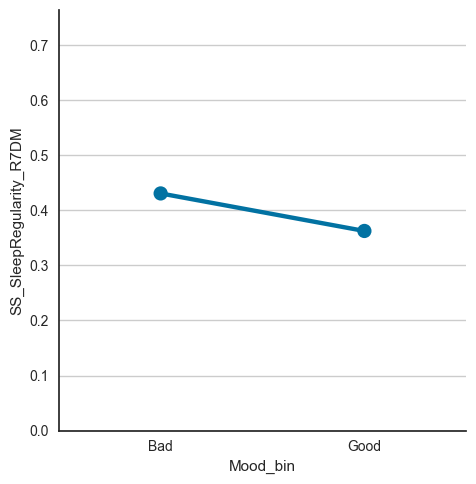

In [39]:
for col in ['CaloriesBurned', 'Steps', 'Distance',
       'Floors', 'SedentaryMinutes', 'LightlyActiveMinutes',
       'FairlyActiveMinutes', 'VeryActiveMinutes', 'ActivityCalories',
       'CaloriesBurned_R7DM', 'Steps_R7DM', 'Distance_R7DM', 'Floors_R7DM',
       'SedentaryMinutes_R7DM', 'LightlyActiveMinutes_R7DM',
       'FairlyActiveMinutes_R7DM', 'VeryActiveMinutes_R7DM',
       'ActivityCalories_R7DM', 'FB_Onset', 'SS_Onset', 'FB_Offset', 'SS_Offset', 'FB_TST', 'SS_TST', 
            'FB_WASO', 'SS_WASO', 'FB_NOA', 'SS_NOA', 'FB_TIB', 'SS_TIB', 'FB_REMSD', 'SS_REMSD', 
            'FB_LSD', 'SS_LSD', 'FB_DSD', 'SS_DSD', 'FB_TSDP', 'SS_TSDP', 'FB_AI', 'SS_AI',
            'FB_SWSP', 'SS_SWSP', 'FB_REMP', 'SS_REMP', 'FB_SMI', 'SS_SMI', 'FB_MWD', 'SS_MWD', 
            'FB_Midpoint', 'SS_Midpoint', 'FB_SleepRegularity', 'SS_SleepRegularity', 
            'SS_SOL', 'SS_Waketime', 'SS_ARR', 'SS_SS', 'SS_MS', 'SS_BS', 'SS_SE', 'Week', 'SS_SOL_R7DM',
       'SS_Onset_R7DM', 'SS_TST_R7DM', 'SS_WASO_R7DM', 'SS_NOA_R7DM',
       'SS_SleepRegularity_R7DM']:
    sns.catplot(data=df, x='Mood_bin', y=col, kind='point', errorbar=None)
    plt.ylim(0, df[col].max())
    plt.savefig(f'./../visuals/Mood_bin_{col}.png');

## End